In [79]:
# Import libraries

import pandas as pd

import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk

In [80]:
df = pd.read_csv('TrainingData/training_dataset.csv')

#df=df['crimeaditionalinfo'].drop_duplicates()
df = df[df['crimeaditionalinfo'].notnull()]
stop_words =open("hindi_stopwords.txt").read().split('\n')

def remove_stopwords(text):
    
    if pd.isna(text):
        return text
    words=text.split()
    filtered_words=[word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

df['cleaned_crime_info']=df['crimeaditionalinfo'].fillna("").apply(remove_stopwords)

# Ensure all text data is in string format

df['crimeaditionalinfo'] = df['crimeaditionalinfo'].astype(str)

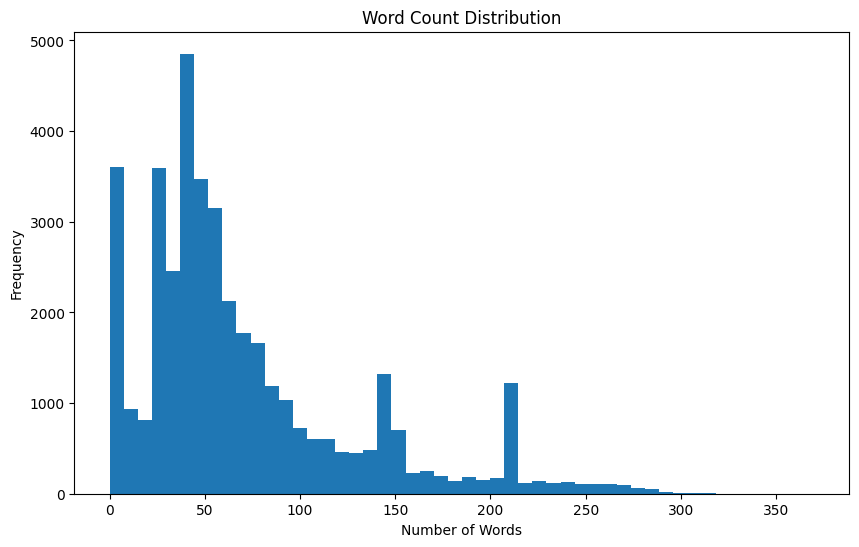

In [81]:
### Text Length Analysis

df['num_words'] = df['crimeaditionalinfo'].apply(lambda x: len(str(x).split()))

df['num_chars'] = df['crimeaditionalinfo'].apply(len)

plt.figure(figsize=(10, 6))

df['num_words'].plot(kind='hist', bins=50, title='Word Count Distribution')

plt.xlabel('Number of Words')

plt.show()

In [82]:
### Frequent Word Analysis

all_words = " ".join(df['cleaned_crime_info']).split()

word_freq = Counter(all_words)



# Display top 10 most frequent words

print("Top 10 Frequent Words:", word_freq.most_common(10))

Top 10 Frequent Words: [('account', 15268), ('money', 14080), ('call', 13652), ('number', 13328), ('amount', 12990), ('AMOUNT', 9150), ('pay', 8889), ('ACCOUNT', 8618), ('person', 8388), ('TOTAL', 8285)]


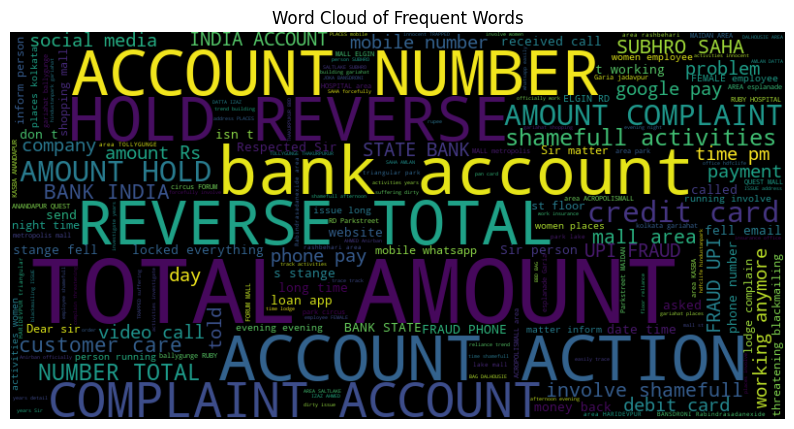

In [83]:
# Generate a WordCloud

wordcloud = WordCloud(width=800, height=400).generate(" ".join(all_words))

plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.title('Word Cloud of Frequent Words')

plt.show()

In [84]:
### N-Gram Analysis

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)

bigrams = vectorizer.fit_transform(df['cleaned_crime_info'])

bigram_freq = vectorizer.get_feature_names_out()

print("Top 10 Bigrams:", bigram_freq[:10])

Top 10 Bigrams: ['account action' 'account number' 'amount complaint' 'amount hold'
 'amount rs' 'bank account' 'bank india' 'complaint account' 'credit card'
 'customer care']


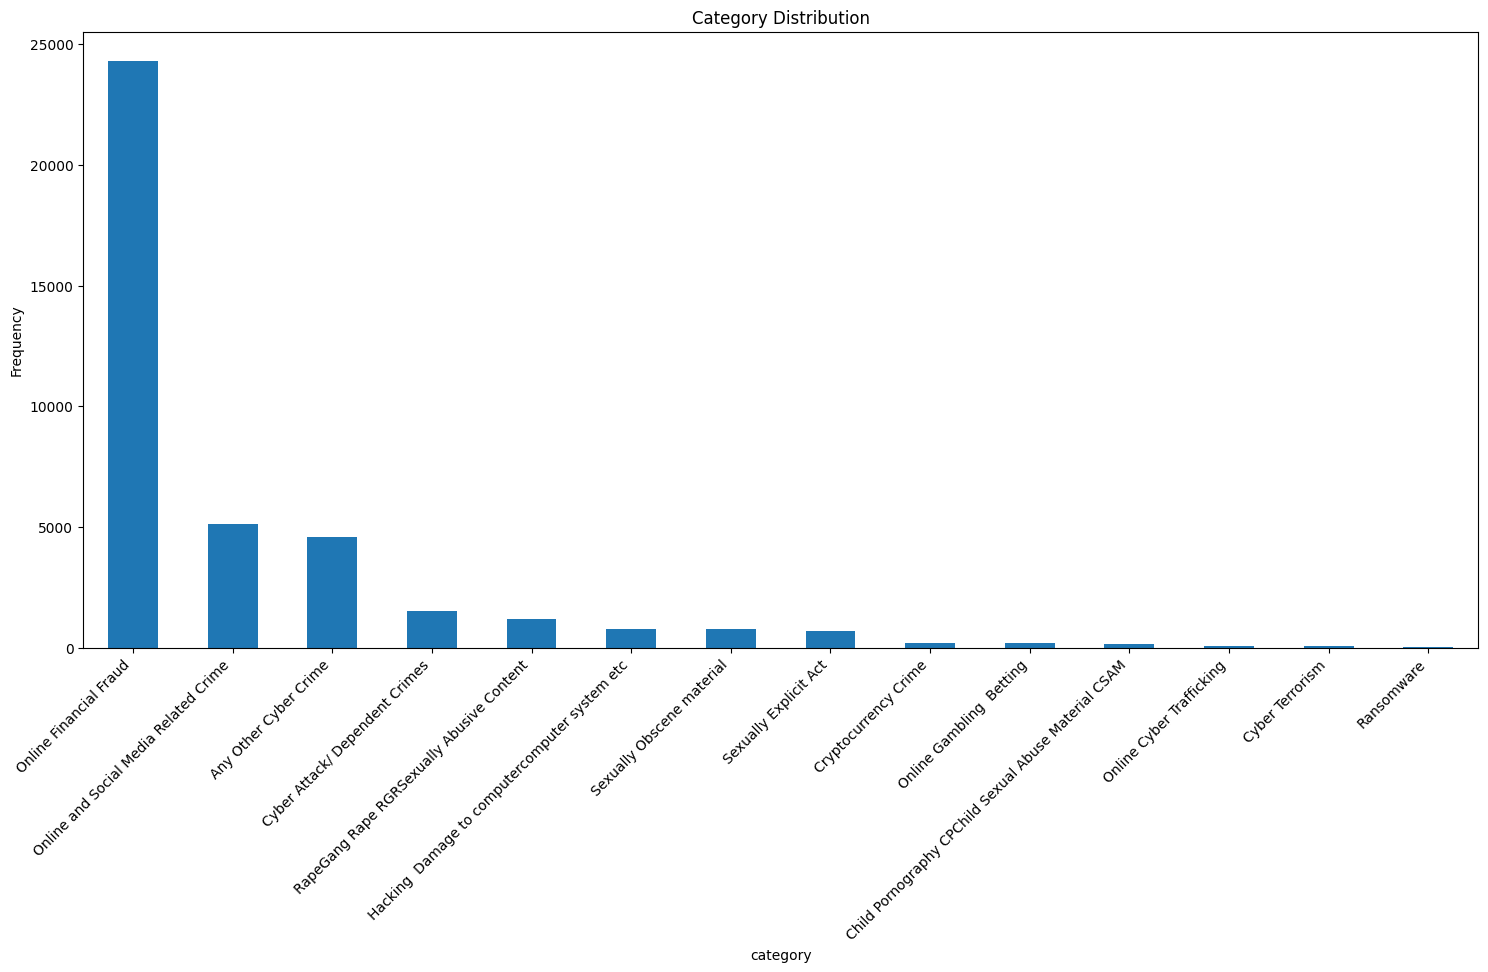

In [85]:
### Category and Subcategory Distribution

category_counts = df['category'].value_counts()

subcategory_counts = df['sub_category'].value_counts()



# Plot category distribution

plt.figure(figsize=(18, 8))

category_counts.plot(kind='bar', title='Category Distribution')

plt.ylabel('Frequency')
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()

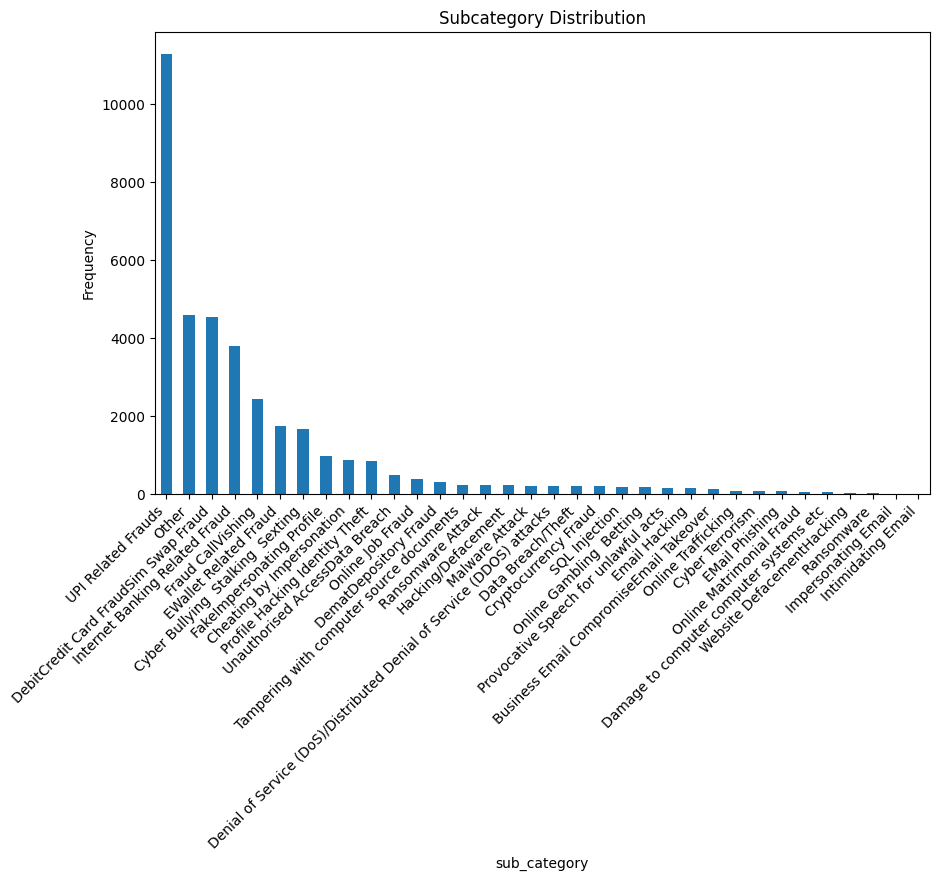

In [86]:
# Plot subcategory distribution

plt.figure(figsize=(10, 6))

subcategory_counts.plot(kind='bar', title='Subcategory Distribution')

plt.ylabel('Frequency')
plt.xticks(rotation=45,ha='right',fontsize=10)

plt.show()

In [87]:
### Word Diversity Analysis

unique_words = set(" ".join(df['crimeaditionalinfo']).split())

total_words = len(" ".join(df['crimeaditionalinfo']).split())

diversity = len(unique_words) / total_words



print(f"Total Words: {total_words}, Unique Words: {len(unique_words)}, Diversity: {diversity:.2f}")

Total Words: 2780897, Unique Words: 80961, Diversity: 0.03


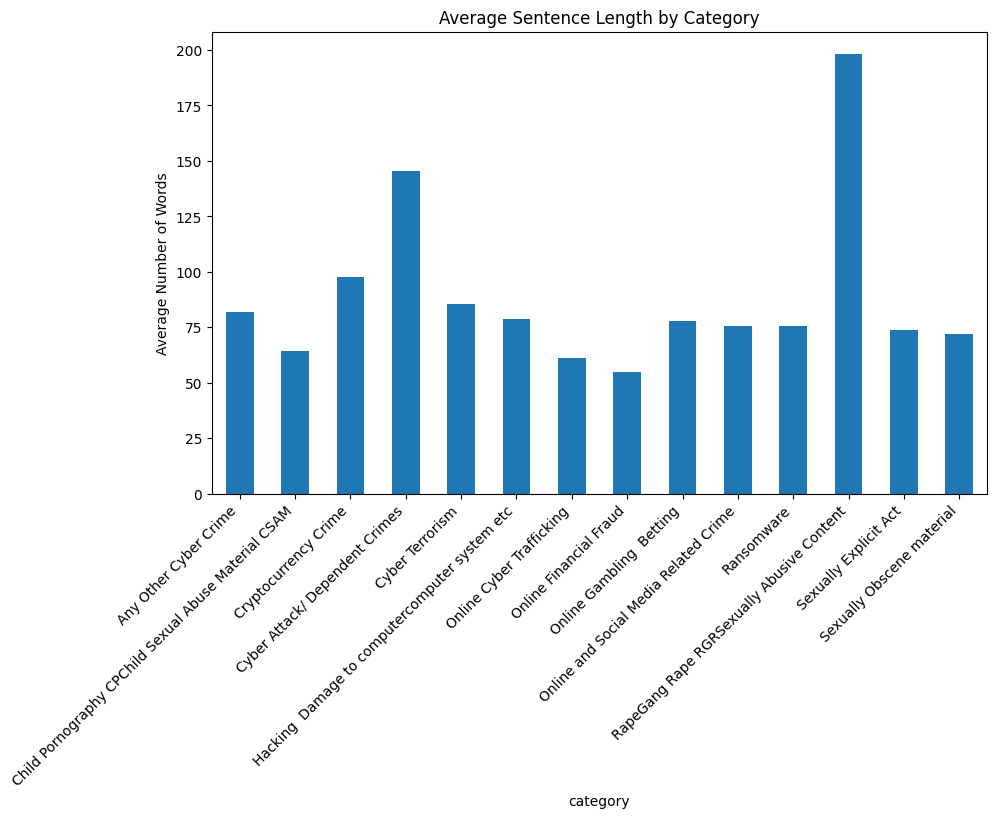

In [88]:
### Sentence Structure Analysis

avg_length_by_category = df.groupby('category')['num_words'].mean()

plt.figure(figsize=(10, 6))

avg_length_by_category.plot(kind='bar', title='Average Sentence Length by Category')

plt.ylabel('Average Number of Words')
plt.xticks(rotation=45,ha='right',fontsize=10)

plt.show()

In [89]:
### Stopword Analysis

#stop_words = set(stopwords.words('english'))

df['stopword_count'] = df['crimeaditionalinfo'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

df['stopword_ratio'] = df['stopword_count'] / df['num_words']

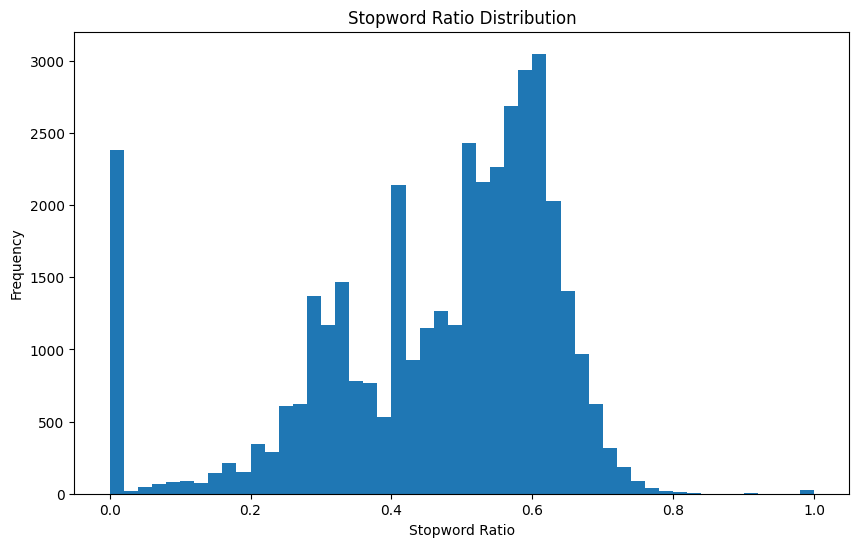

In [90]:
# Plot stopword ratio distribution

plt.figure(figsize=(10, 6))

df['stopword_ratio'].plot(kind='hist', bins=50, title='Stopword Ratio Distribution')

plt.xlabel('Stopword Ratio')

plt.show()

In [91]:
### Category-Specific Keyword Analysis

tfidf = TfidfVectorizer(max_features=10)

category_keywords = {}



for category in df['category'].unique():

    category_text = df[df['category'] == category]['crimeaditionalinfo']

    tfidf_matrix = tfidf.fit_transform(category_text)

    category_keywords[category] = tfidf.get_feature_names_out()

In [92]:
# Display keywords

print("Category-Specific Keywords:")

for category, keywords in category_keywords.items():

    print(f"Category: {category}, Keywords: {keywords}")

Category-Specific Keywords:
Category: Online and Social Media Related Crime, Keywords: ['and' 'he' 'is' 'me' 'my' 'of' 'on' 'that' 'the' 'to']
Category: Online Financial Fraud, Keywords: ['account' 'amount' 'and' 'bank' 'fraud' 'me' 'my' 'of' 'the' 'to']
Category: Online Gambling  Betting, Keywords: ['and' 'have' 'he' 'in' 'me' 'money' 'my' 'the' 'they' 'to']
Category: RapeGang Rape RGRSexually Abusive Content, Keywords: ['activities' 'and' 'area' 'in' 'mall' 'of' 'shamefull' 'they' 'to' 'you']
Category: Any Other Cyber Crime, Keywords: ['and' 'from' 'is' 'me' 'my' 'of' 'that' 'the' 'they' 'to']
Category: Cyber Attack/ Dependent Crimes, Keywords: ['and' 'but' 'even' 'everything' 'it' 'my' 'the' 'this' 'to' 'was']
Category: Cryptocurrency Crime, Keywords: ['and' 'in' 'is' 'me' 'my' 'of' 'that' 'the' 'they' 'to']
Category: Sexually Explicit Act, Keywords: ['and' 'he' 'in' 'is' 'me' 'my' 'of' 'that' 'the' 'to']
Category: Sexually Obscene material, Keywords: ['and' 'he' 'is' 'me' 'my' 'of'

In [93]:
### Handling Class Imbalance

category_counts = df['category'].value_counts(normalize=True) * 100

subcategory_counts = df['sub_category'].value_counts(normalize=True) * 100

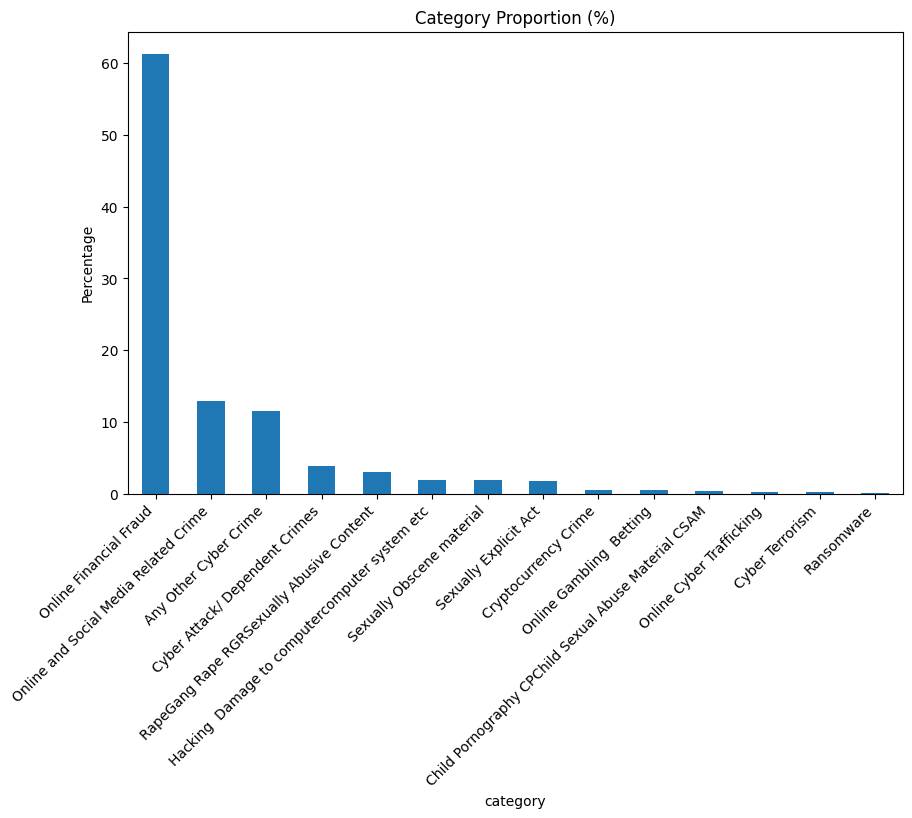

In [94]:
# Plot imbalance

plt.figure(figsize=(10, 6))

category_counts.plot(kind='bar', title='Category Proportion (%)')

plt.ylabel('Percentage')
plt.xticks(rotation=45,ha='right',fontsize=10)


plt.show()

Top 10 Bigrams:
                  Bigram  Frequency
9189       total amount       9032
1142       bank account       4115
211      account number       3817
86       account action       3812
7761      reverse total       3604
4091       hold reverse       3600
2292  complaint account       3572
521    amount complaint       3550
558         amount hold       3537
2478        credit card       3417


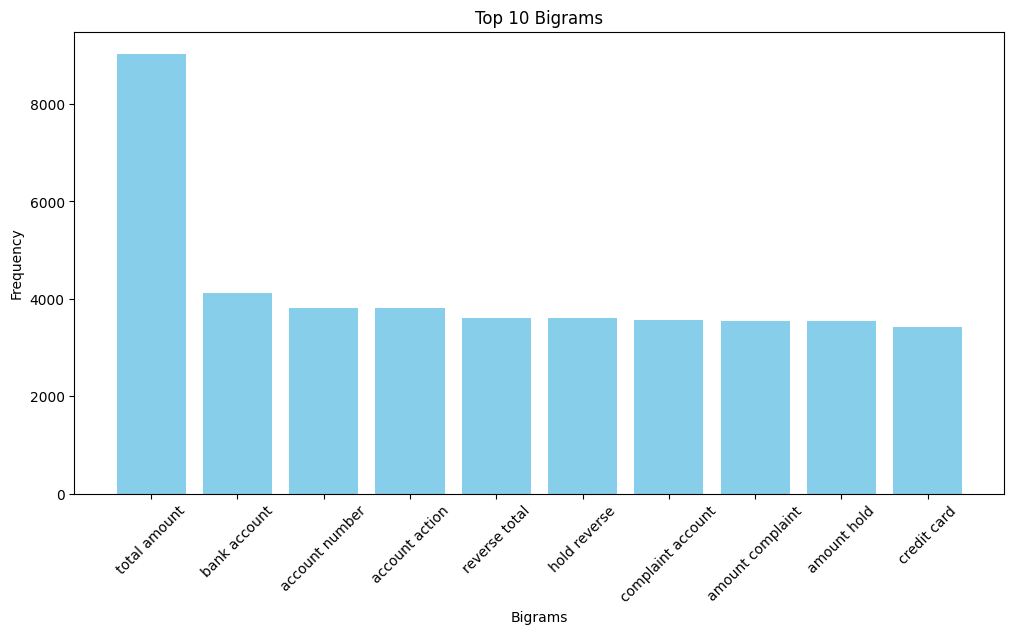

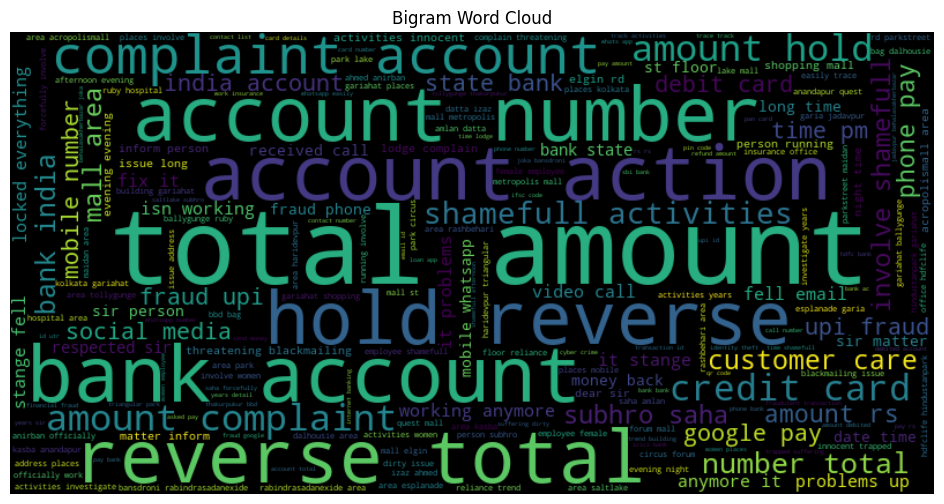

In [95]:
# Create a CountVectorizer for bigram analysis

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=10000)  # Top 20 bigrams
bigram_matrix = vectorizer.fit_transform(df['cleaned_crime_info'])
bigram_freq = bigram_matrix.sum(axis=0).A1
bigrams = vectorizer.get_feature_names_out()



# Create a DataFrame for bigram frequencies
bigram_df = pd.DataFrame({'Bigram': bigrams, 'Frequency': bigram_freq}).sort_values(by='Frequency', ascending=False)
# Display top 10 bigrams
print("Top 10 Bigrams:\n", bigram_df.head(10))
### Bigram Visualization

# Plot bigram frequencies

plt.figure(figsize=(12, 6))

plt.bar(bigram_df['Bigram'][:10], bigram_df['Frequency'][:10], color='skyblue')

plt.xlabel('Bigrams')

plt.ylabel('Frequency')

plt.title('Top 10 Bigrams')

plt.xticks(rotation=45)

plt.show()



### Bigram WordCloud

bigram_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(zip(bigrams, bigram_freq)))

plt.figure(figsize=(12, 6))

plt.imshow(bigram_wordcloud, interpolation='bilinear')

plt.axis('off')

plt.title('Bigram Word Cloud')

plt.show()